In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.utils import resample
import plotly.express as px
from collections import Counter

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from astropy.table import Table

#metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder



import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Train_Data.csv')


In [44]:
df.shape

(614, 13)

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


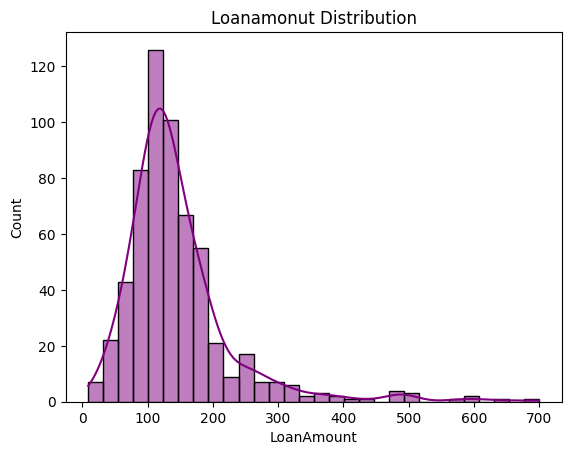

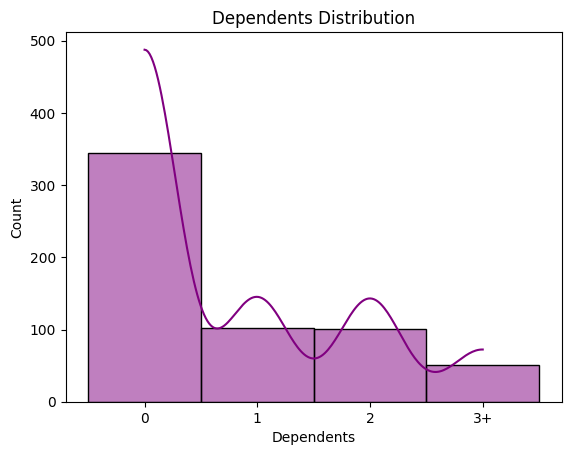

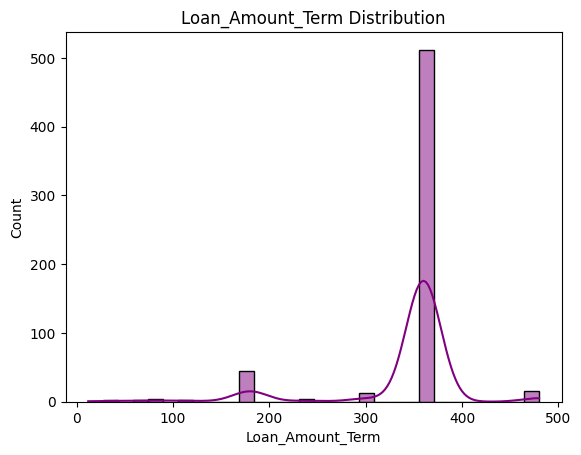

In [48]:
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='purple')
plt.title('Loanamonut Distribution')
plt.show()
sns.histplot(df['Dependents'], kde=True, bins=30, color='purple')
plt.title('Dependents Distribution')
plt.show()
sns.histplot(df['Loan_Amount_Term'], kde=True, bins=30, color='purple')
plt.title('Loan_Amount_Term Distribution')
plt.show()

In [49]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [50]:
fig = px.histogram(df["Dependents"],x ="Dependents" ,y = "Dependents" )
fig.update_layout(title="dependets")
fig.show()

fig = px.histogram(df["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(df["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

In [51]:
df["Dependents"] = df["Dependents"].replace('3+',int(3))
df["Dependents"] = df["Dependents"].replace('1',int(1))
df["Dependents"] = df["Dependents"].replace('2',int(2))
df["Dependents"] = df["Dependents"].replace('0',int(0))
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

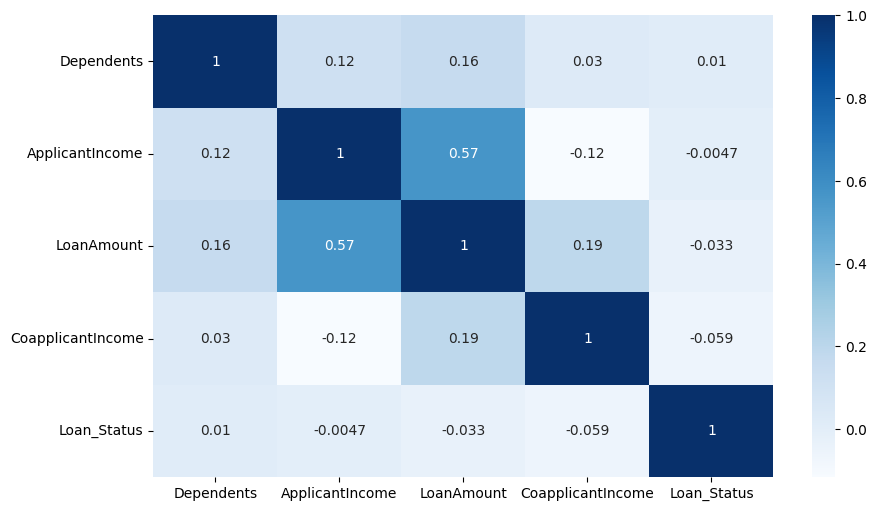

In [52]:
dff=['Dependents','ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Status']
plt.figure(figsize=(10,6))
sns.heatmap(df[dff].corr(),annot=True,cmap="Blues")
plt.show()

"# 4. Histogram\nplt.subplot(1, 2, 2)\nplt.hist(df['LoanAmount'], bins=10, edgecolor='k')\nplt.title('Histogram')\nplt.show()"

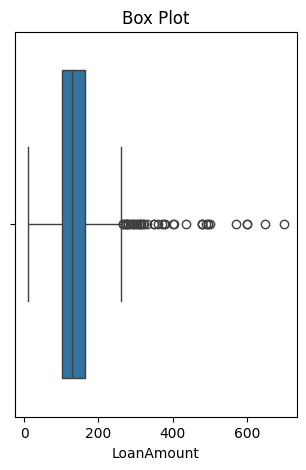

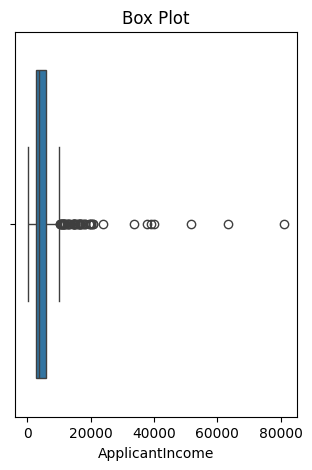

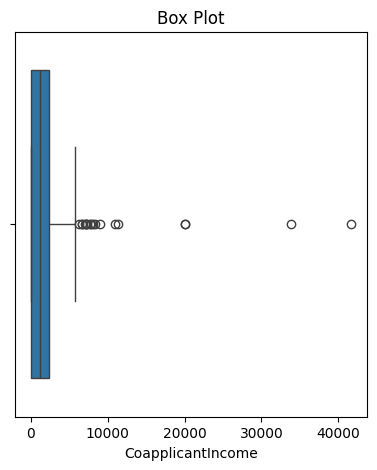

In [53]:

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['LoanAmount'])
plt.title('Box Plot')

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Box Plot')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['CoapplicantIncome'])
plt.title('Box Plot')



'''# 4. Histogram
plt.subplot(1, 2, 2)
plt.hist(df['LoanAmount'], bins=10, edgecolor='k')
plt.title('Histogram')
plt.show()'''



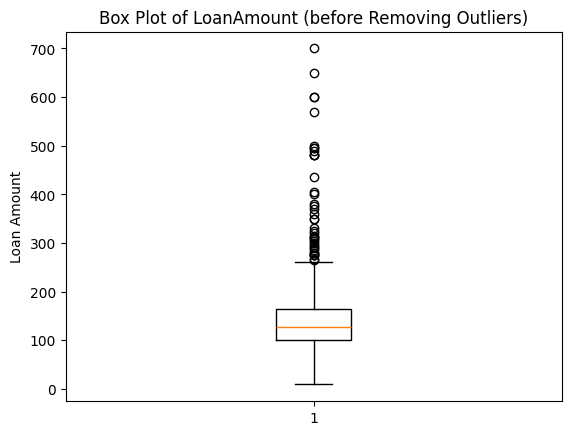

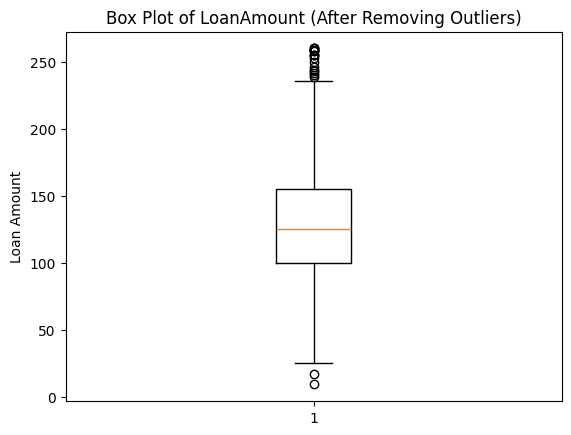

In [54]:
df = df.dropna(subset=['LoanAmount'])

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]
#print(df_cleaned)

plt.boxplot(df['LoanAmount'])
plt.title('Box Plot of LoanAmount (before Removing Outliers)')
plt.ylabel('Loan Amount')
plt.show()


plt.boxplot(df_cleaned['LoanAmount'])
plt.title('Box Plot of LoanAmount (After Removing Outliers)')
plt.ylabel('Loan Amount')
plt.show()



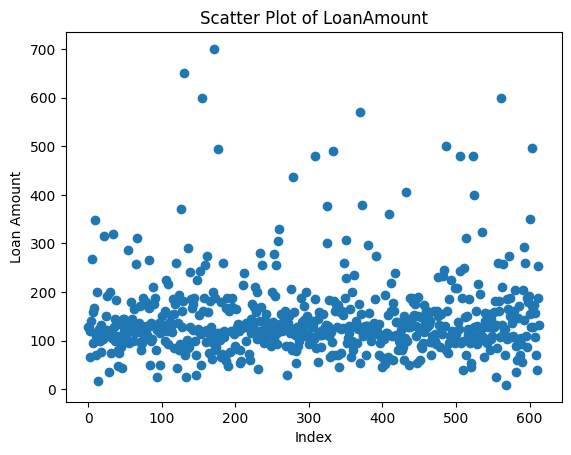

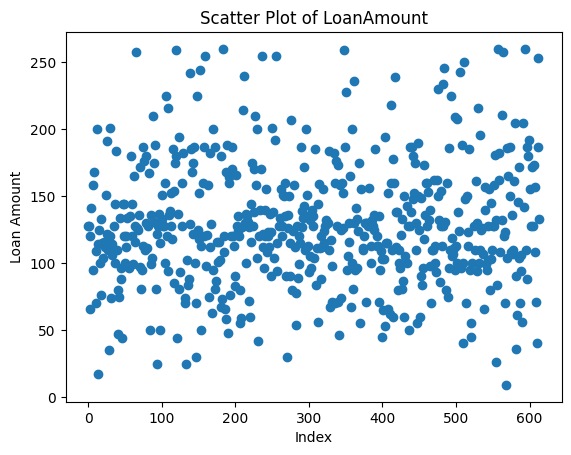

In [55]:
plt.scatter(df.index, df['LoanAmount'])
plt.title('Scatter Plot of LoanAmount')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.show()
plt.scatter(df_cleaned.index, df_cleaned['LoanAmount'])
plt.title('Scatter Plot of LoanAmount')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.show()



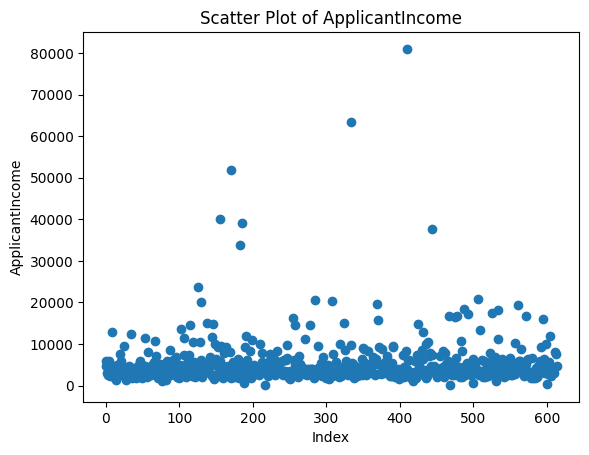

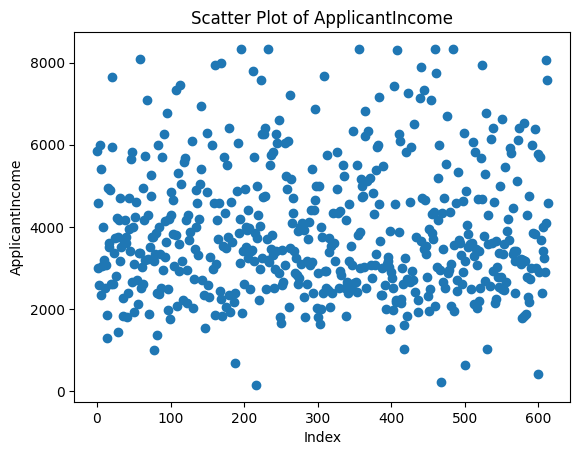

In [56]:
plt.scatter(df.index, df['ApplicantIncome'])
plt.title('Scatter Plot of ApplicantIncome')
plt.xlabel('Index')
plt.ylabel('ApplicantIncome')
plt.show()


df = df.dropna(subset=['ApplicantIncome'])

Q1 = df['ApplicantIncome'].quantile(0.30)
Q3 = df['ApplicantIncome'].quantile(0.70)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_app = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

plt.scatter(df_app.index, df_app['ApplicantIncome'])
plt.title('Scatter Plot of ApplicantIncome')
plt.xlabel('Index')
plt.ylabel('ApplicantIncome')
plt.show()

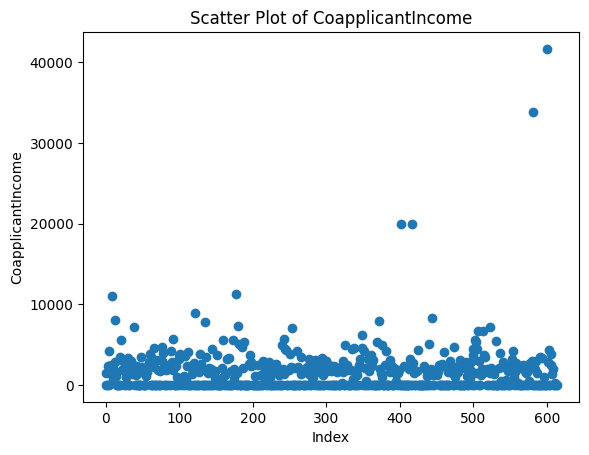

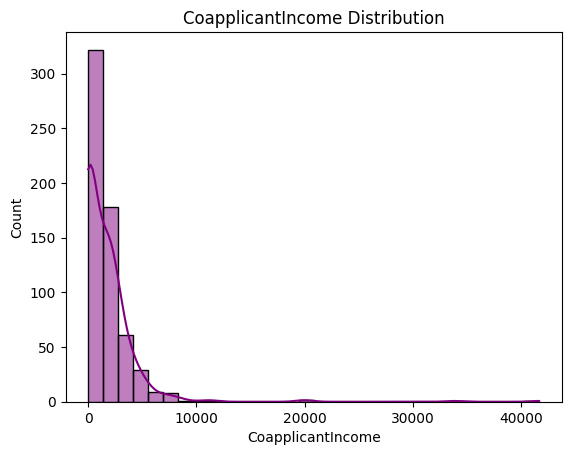

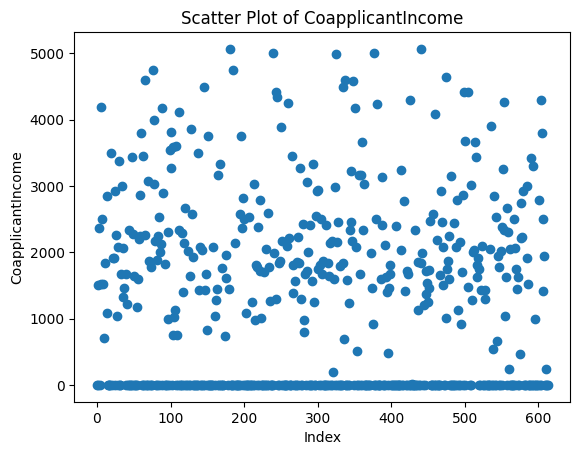

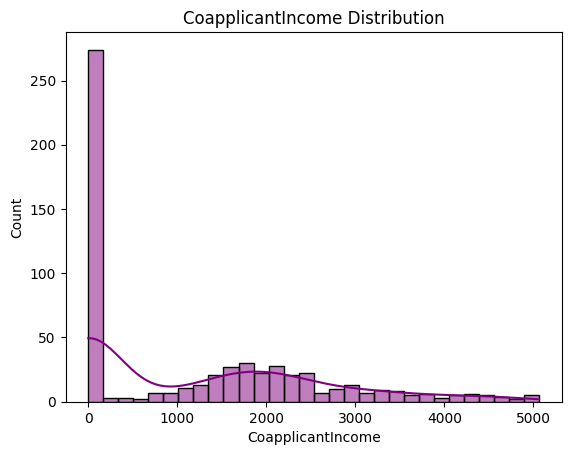

In [57]:
plt.scatter(df.index, df['CoapplicantIncome'])
plt.title('Scatter Plot of CoapplicantIncome')
plt.xlabel('Index')
plt.ylabel('CoapplicantIncome')
plt.show()
sns.histplot(df['CoapplicantIncome'], kde=True, bins=30, color='purple')
plt.title('CoapplicantIncome Distribution')
plt.show()

df = df.dropna(subset=['CoapplicantIncome'])

Q1 = df['CoapplicantIncome'].quantile(0.30)
Q3 = df['CoapplicantIncome'].quantile(0.70)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_app = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

plt.scatter(df_app.index, df_app['CoapplicantIncome'])
plt.title('Scatter Plot of CoapplicantIncome')
plt.xlabel('Index')
plt.ylabel('CoapplicantIncome')
plt.show()


sns.histplot(df_app['CoapplicantIncome'], kde=True, bins=30, color='purple')
plt.title('CoapplicantIncome Distribution')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


labelencoder = LabelEncoder()
for column in categorical_columns:
    df[column] = labelencoder.fit_transform(df[column].astype(str))


Feature importance by Random Forest:->

Gender -> 0.01756011768236957
Married -> 0.022419697310166034
Dependents -> 0.04902116060597467
Education -> 0.023337945211634188
Self_Employed -> 0.018501351342661412
ApplicantIncome -> 0.20772290370630114
CoapplicantIncome -> 0.11679615451079566
LoanAmount -> 0.18522204516489948
Loan_Amount_Term -> 0.043602177528869406
Credit_History -> 0.2701271503445391
Property_Area -> 0.04568929659178928


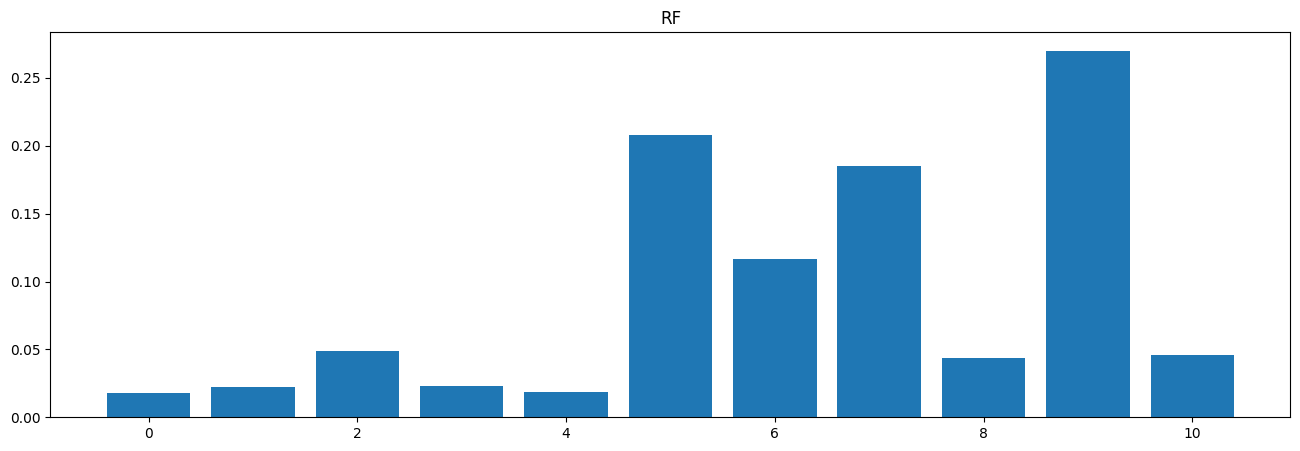

In [59]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

X = df.drop(["Loan_ID","Loan_Status",],axis=1)
y = df["Loan_Status"]


print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()



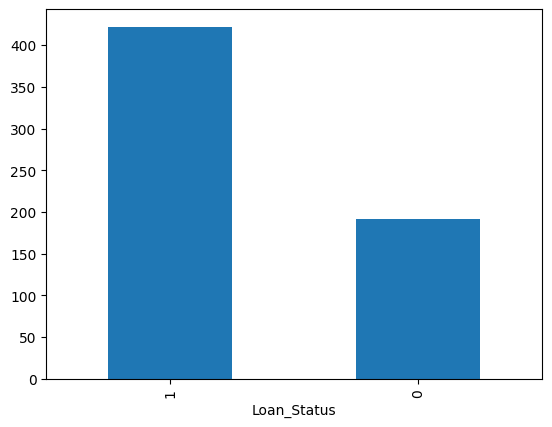

In [60]:
dfff=df['Loan_Status'].value_counts()
dfff.plot(kind='bar')
plt.show()


In [61]:

new_data = df.copy()
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]



df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())


df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 Loan_Status
1    192
0    192
Name: count, dtype: int64
Upsampled data:->
 Loan_Status
1    422
0    422
Name: count, dtype: int64


In [62]:
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

models = []

models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))


Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print("random",classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


random               precision    recall  f1-score   support

           0       0.44      0.86      0.58        22
           1       0.96      0.76      0.85       101

    accuracy                           0.78       123
   macro avg       0.70      0.81      0.72       123
weighted avg       0.87      0.78      0.80       123

RandomForestClassifier:> 0.7804878048780488
              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

DecisionTreeClassifier:> 0.7886178861788617


In [63]:
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status



X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=0)



StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


models = []

models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))







Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print("random",classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))



random               precision    recall  f1-score   support

           0       0.50      0.86      0.63        14
           1       0.87      0.52      0.65        25

    accuracy                           0.64        39
   macro avg       0.68      0.69      0.64        39
weighted avg       0.74      0.64      0.64        39

RandomForestClassifier:> 0.6410256410256411
              precision    recall  f1-score   support

           0       0.46      0.85      0.59        13
           1       0.87      0.50      0.63        26

    accuracy                           0.62        39
   macro avg       0.66      0.67      0.61        39
weighted avg       0.73      0.62      0.62        39

DecisionTreeClassifier:> 0.6153846153846154


In [64]:
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=0)



StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)



models = []

models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))







Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print("random",classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


random               precision    recall  f1-score   support

           0       0.67      0.94      0.78        36
           1       0.94      0.65      0.77        49

    accuracy                           0.78        85
   macro avg       0.80      0.80      0.78        85
weighted avg       0.82      0.78      0.78        85

RandomForestClassifier:> 0.7764705882352941
              precision    recall  f1-score   support

           0       0.47      0.86      0.61        28
           1       0.88      0.53      0.66        57

    accuracy                           0.64        85
   macro avg       0.68      0.69      0.63        85
weighted avg       0.75      0.64      0.64        85

DecisionTreeClassifier:> 0.6352941176470588


In [65]:
X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Property_Area","Loan_Status"],axis=1)
#X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status



X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=0)


StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


models = []

models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))






Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print("random",classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))



Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


random               precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.81      0.88      0.84        43

    accuracy                           0.77        62
   macro avg       0.74      0.71      0.72        62
weighted avg       0.77      0.77      0.77        62

RandomForestClassifier:> 0.7741935483870968
              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.98      0.87      0.92        53

    accuracy                           0.87        62
   macro avg       0.76      0.88      0.79        62
weighted avg       0.91      0.87      0.88        62

DecisionTreeClassifier:> 0.8709677419354839
